In [1]:
# Brief intro about dataset

In [2]:
'''
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of
experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to 
make predictions and draw conclusions.
'''

'\nSince 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of\nexperiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.\n\nThis data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to \nmake predictions and draw conclusions.\n'

In [3]:
'''
What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?
'''

'\nWhat can we learn about different hosts and areas?\nWhat can we learn from predictions? (ex: locations, prices, reviews, etc)\nWhich hosts are the busiest and why?\nIs there any noticeable difference of traffic among different areas and what could be the reason for it?\n'

In [4]:
# Import all necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor

In [6]:
# Loading dataset 

In [16]:
bnb=pd.read_csv("C://Users//acer//Desktop//1sem//python//My stuff//new-york-city-airbnb-open-data//AB_NYC_2019.CSV")

In [8]:
# Looking at first few rows

In [9]:
bnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [10]:
# Looking at last few rows

In [11]:
bnb.tail(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [12]:
# dataset shape

In [13]:
bnb.shape

(48895, 16)

In [14]:
# Listing all columns of dataset

In [15]:
bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [16]:
# Listing all columns datatype

In [17]:
bnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [18]:
# Looking at stats value of dataset

In [19]:
bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [20]:
# Data Preparation

In [17]:
bnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [22]:
# Replacing null values

In [18]:
bnb["name"].replace(np.nan,"Unknown",inplace=True)

In [19]:
bnb["host_name"].replace(np.nan,"Unknown",inplace=True)

In [20]:
bnb["last_review"].replace(np.nan,"0000-00-00",inplace=True)

In [21]:
bnb.reviews_per_month.fillna(bnb.reviews_per_month.mean(),inplace=True)

In [27]:
# Lets check for any duplicate values

In [22]:
bnb.drop_duplicates(inplace=True)

In [23]:
bnb.shape

(48895, 16)

In [30]:
# Lets check whether we have done everything correct

In [12]:
bnb.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [32]:
bnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
# here we are deleting this name and host_name column as it has no relationship with our target variable

In [35]:
bnb=bnb.drop("name",axis=1)

In [45]:
bnb=bnb.drop("host_name",axis=1)

In [ ]:
# lets apply one hot encoding to neighbourhood_group column

In [49]:
bour=pd.get_dummies(bnb["neighbourhood_group"],prefix="bour_",drop_first=True)

In [ ]:
# convering to dataframe

In [50]:
bour_df=pd.DataFrame(bour,columns=bour.columns)

In [ ]:
# concating with original dataframe

In [51]:
bnb=pd.concat([bour_df,bnb],axis=1)

In [ ]:
# dropping neighbourhood_group column

In [53]:
bnb=bnb.drop("neighbourhood_group",axis=1)

In [ ]:
# lets move to another categorical column neighbourhood

In [59]:
bnb.neighbourhood.value_counts().sort_values(ascending=False).head(20)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Washington Heights     899
West Village           768
Financial District     744
Flatbush               621
Clinton Hill           572
Name: neighbourhood, dtype: int64

In [73]:
top20_bour=[x for x in bnb.neighbourhood.value_counts().sort_values(ascending=False).head(20).index]
print(top20_bour)

['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side', "Hell's Kitchen", 'East Village', 'Upper East Side', 'Crown Heights', 'Midtown', 'East Harlem', 'Greenpoint', 'Chelsea', 'Lower East Side', 'Astoria', 'Washington Heights', 'West Village', 'Financial District', 'Flatbush', 'Clinton Hill']


In [75]:
for label in top20_bour:
    bnb[label]=np.where(bnb["neighbourhood"]==label,1,0)

In [ ]:
# lets see the table columns

In [79]:
bnb.columns

Index(['bour__Brooklyn', 'bour__Manhattan', 'bour__Queens',
       'bour__Staten Island', 'id', 'host_id', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'Williamsburg',
       'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'Upper West Side',
       'Hell's Kitchen', 'East Village', 'Upper East Side', 'Crown Heights',
       'Midtown', 'East Harlem', 'Greenpoint', 'Chelsea', 'Lower East Side',
       'Astoria', 'Washington Heights', 'West Village', 'Financial District',
       'Flatbush', 'Clinton Hill'],
      dtype='object')

In [ ]:
# as we have encoded neighbourhood column now we will delete this column

In [80]:
bnb=bnb.drop("neighbourhood",axis=1)

In [ ]:
# Lets apply one hot encoding to roomtype column

In [84]:
room=pd.get_dummies(bnb["room_type"],prefix="room_",drop_first=True)

In [85]:
room_df=pd.DataFrame(room,columns=room.columns)

In [86]:
bnb=pd.concat([room_df,bnb],axis=1)

In [87]:
bnb=bnb.drop("room_type",axis=1)

In [ ]:
# Lets look at the last_review column and apply OHE

In [97]:
top10_review=[x for x in bnb.last_review.value_counts().sort_values(ascending=False).head(10).index]

In [98]:
for label in top10_review:
    bnb[label]=np.where(bnb["last_review"]==label,1,0)

In [101]:
bnb=bnb.drop("last_review",axis=1)

In [ ]:
# lets look at the data types of columns

In [103]:
bnb.dtypes

room__Private room                  uint8
room__Shared room                   uint8
bour__Brooklyn                      uint8
bour__Manhattan                     uint8
bour__Queens                        uint8
bour__Staten Island                 uint8
id                                  int64
host_id                             int64
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
Williamsburg                        int32
Bedford-Stuyvesant                  int32
Harlem                              int32
Bushwick                            int32
Upper West Side                     int32
Hell's Kitchen                      int32
East Village                        int32
Upper East Side                   

In [ ]:
# looks like everything is fine and we can proceed to apply ml algo

In [104]:
y=bnb["price"]
x=bnb.drop("price",axis=1)

In [ ]:
# Lets check for which features are important

In [ ]:
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [108]:
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.01082762 0.00200458 0.00118307 0.00129892 0.00131761 0.00031223
 0.12883398 0.11767347 0.12786075 0.12805559 0.09251678 0.08493119
 0.09099497 0.05177381 0.08729326 0.00113837 0.00148945 0.00093494
 0.00074998 0.00209724 0.00145035 0.00170569 0.00117452 0.00172541
 0.00141738 0.0009374  0.00091658 0.0011828  0.00133962 0.00153886
 0.00051017 0.00113687 0.00068914 0.00108549 0.00103409 0.00669154
 0.00662833 0.00575982 0.00629999 0.00476329 0.00380772 0.00396108
 0.0039501  0.0035579  0.00344802]


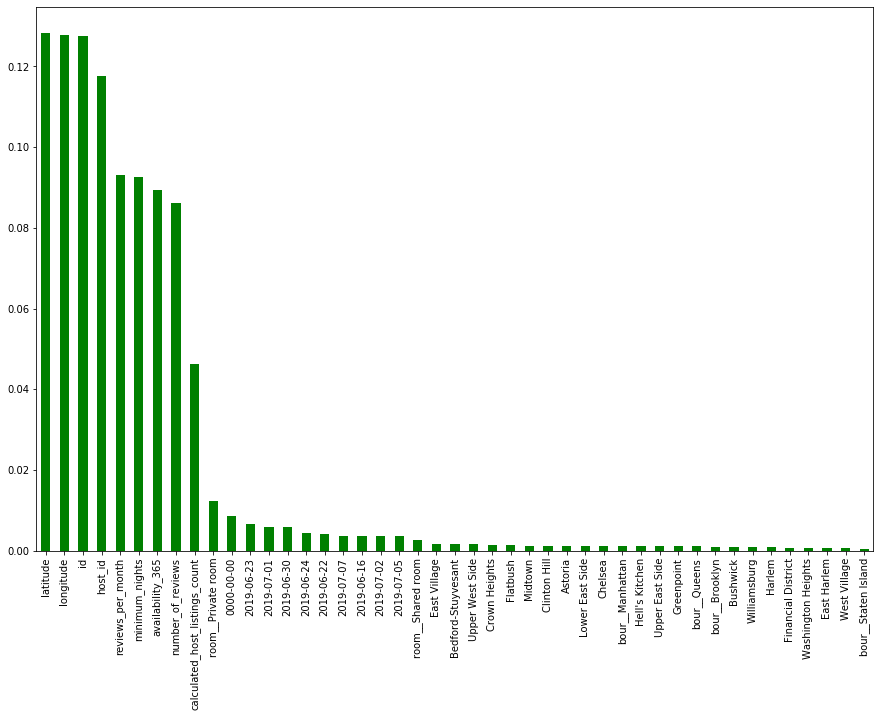

In [121]:
fig=plt.figure(figsize=(15,10))
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nlargest(46).plot(kind="bar",color="green")
plt.show()

In [ ]:
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

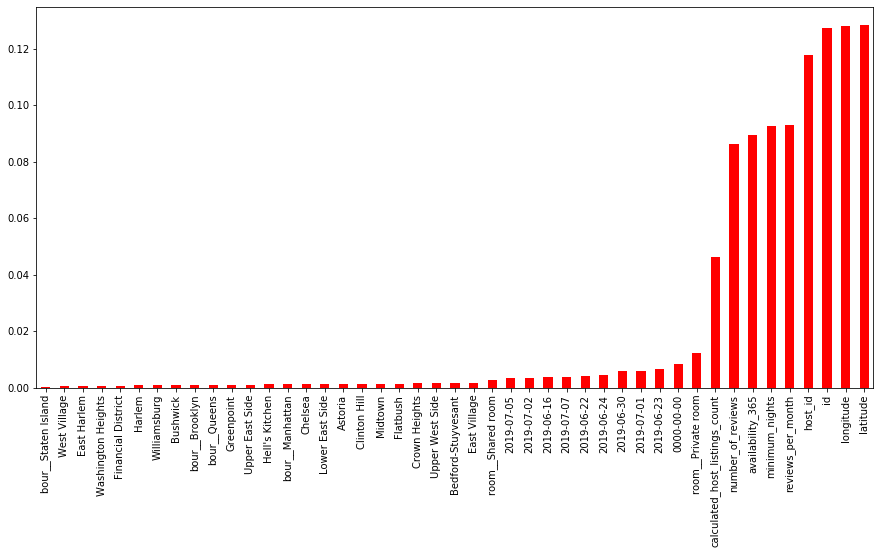

In [125]:
fig=plt.figure(figsize=(15,7))
feat_imp=pd.Series(model.feature_importances_,index=x.columns)
feat_imp.nsmallest(46).plot(kind="bar",color="red")
plt.show()

In [ ]:
# Lets divide our data into train and test

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# lets see the shape of train and test dataset

In [127]:
print("shape of x_train is:",x_train.shape)
print("shape of y_train is:",y_train.shape)
print("shape of x_test is:",x_test.shape)
print("shape of y_test is:",y_test.shape)

shape of x_train is: (34226, 45)
shape of y_train is: (34226,)
shape of x_test is: (14669, 45)
shape of y_test is: (14669,)


In [ ]:
# Lets apply ml algo

In [137]:
lr=LinearRegression()
lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

In [138]:
output=pd.DataFrame({"Actual":y_test,"predicted":prediction})
print(output)

       Actual   predicted
879        89  190.399548
44383      30   98.388812
15394     120  110.798650
43230     470  207.534673
16332     199  171.854811
...       ...         ...
9370       65  103.034856
34442      55   99.961957
9164       90  121.838658
11841      95  103.451377
46958      97  207.954922

[14669 rows x 2 columns]


In [139]:
print("estimated intercept is",lr.intercept_)
print("the no of coefficient in model are",lr.coef_)
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("variance score: %.2f" % lr.score(x_test,y_test))
coef=zip(x.columns,lr.coef_)
coef_df=pd.DataFrame(list(coef),columns=["feat","coeff"])
print(coef_df)

estimated intercept is -19358.523046763836
the no of coefficient in model are [-1.03765016e+02 -1.43848479e+02 -2.33393179e+01  5.84339528e+01
 -3.36407162e+00 -1.10046060e+02 -1.89640666e-07  6.32068748e-08
 -1.73009655e+02 -3.59287879e+02 -6.78225458e-02 -1.80097341e-01
 -4.41079020e-01 -2.45219646e-01  1.93416454e-01  3.62893361e+01
  7.89770344e-01 -4.54683961e+01  2.09348153e+00  1.24882837e+01
 -1.23291024e+01 -2.66887266e+01 -2.16767971e+01 -3.32252692e+00
  4.03291119e+01 -3.12308592e+01  2.05242232e+01  1.49443786e+01
 -1.46624980e+01  1.29727463e+01 -6.42695692e+01  2.72901392e+01
 -1.87126775e+01 -2.62691281e+01  4.69847318e+01  4.70977725e+01
 -3.71000152e+00  7.43600270e-01 -5.66759039e+00  5.02211653e+00
  1.84545735e+01  1.16776654e+00 -2.34224152e+00 -6.52252700e-01
  5.48372130e+00]
mean abs error: 70.09018766022344
mean sq error: 34347.52417030205
root mean sq error: 185.33085056272216
variance score: 0.15
                              feat         coeff
0            

In [134]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [135]:
output=pd.DataFrame({"Actual":y_test,"predicted":prediction})
print(output)

       Actual  predicted
879        89       95.0
44383      30       55.0
15394     120       90.0
43230     470      256.0
16332     199      125.0
...       ...        ...
9370       65       90.0
34442      55       80.0
9164       90      110.0
11841      95       95.0
46958      97      195.0

[14669 rows x 2 columns]


In [136]:
print("estimated intercept is",lr.intercept_)
print("the no of coefficient in model are",lr.coef_)
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("variance score: %.2f" % lr.score(x_test,y_test))
coef=zip(x.columns,lr.coef_)
coef_df=pd.DataFrame(list(coef),columns=["feat","coeff"])
print(coef_df)

estimated intercept is -19358.523046763836
the no of coefficient in model are [-1.03765016e+02 -1.43848479e+02 -2.33393179e+01  5.84339528e+01
 -3.36407162e+00 -1.10046060e+02 -1.89640666e-07  6.32068748e-08
 -1.73009655e+02 -3.59287879e+02 -6.78225458e-02 -1.80097341e-01
 -4.41079020e-01 -2.45219646e-01  1.93416454e-01  3.62893361e+01
  7.89770344e-01 -4.54683961e+01  2.09348153e+00  1.24882837e+01
 -1.23291024e+01 -2.66887266e+01 -2.16767971e+01 -3.32252692e+00
  4.03291119e+01 -3.12308592e+01  2.05242232e+01  1.49443786e+01
 -1.46624980e+01  1.29727463e+01 -6.42695692e+01  2.72901392e+01
 -1.87126775e+01 -2.62691281e+01  4.69847318e+01  4.70977725e+01
 -3.71000152e+00  7.43600270e-01 -5.66759039e+00  5.02211653e+00
  1.84545735e+01  1.16776654e+00 -2.34224152e+00 -6.52252700e-01
  5.48372130e+00]
mean abs error: 80.97832163064967
mean sq error: 67028.49458040766
root mean sq error: 258.89861834395265
variance score: 0.15
                              feat         coeff
0            

In [141]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [142]:
output=pd.DataFrame({"Actual":y_test,"predicted":prediction})
print(output)

       Actual  predicted
879        89      126.4
44383      30       55.0
15394     120      100.3
43230     470      260.8
16332     199      133.0
...       ...        ...
9370       65       92.8
34442      55      106.2
9164       90       75.5
11841      95      111.0
46958      97      111.5

[14669 rows x 2 columns]


In [145]:
print("estimated intercept is",lr.intercept_)
print("the no of coefficient in model are",lr.coef_)
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("variance score: %.2f" % lr.score(x_test,y_test))
coef=zip(x.columns,lr.coef_)
coef_df=pd.DataFrame(list(coef),columns=["feat","coeff"])
print(coef_df)

estimated intercept is -19358.523046763836
the no of coefficient in model are [-1.03765016e+02 -1.43848479e+02 -2.33393179e+01  5.84339528e+01
 -3.36407162e+00 -1.10046060e+02 -1.89640666e-07  6.32068748e-08
 -1.73009655e+02 -3.59287879e+02 -6.78225458e-02 -1.80097341e-01
 -4.41079020e-01 -2.45219646e-01  1.93416454e-01  3.62893361e+01
  7.89770344e-01 -4.54683961e+01  2.09348153e+00  1.24882837e+01
 -1.23291024e+01 -2.66887266e+01 -2.16767971e+01 -3.32252692e+00
  4.03291119e+01 -3.12308592e+01  2.05242232e+01  1.49443786e+01
 -1.46624980e+01  1.29727463e+01 -6.42695692e+01  2.72901392e+01
 -1.87126775e+01 -2.62691281e+01  4.69847318e+01  4.70977725e+01
 -3.71000152e+00  7.43600270e-01 -5.66759039e+00  5.02211653e+00
  1.84545735e+01  1.16776654e+00 -2.34224152e+00 -6.52252700e-01
  5.48372130e+00]
mean abs error: 67.32204649260346
mean sq error: 36037.457149771624
root mean sq error: 189.83534220416288
variance score: 0.15
                              feat         coeff
0           

In [147]:
br=BaggingRegressor()
br.fit(x_train,y_train)
prediction=br.predict(x_test)

In [148]:
output=pd.DataFrame({"Actual":y_test,"predicted":prediction})
print(output)

       Actual  predicted
879        89      209.8
44383      30       64.2
15394     120       95.1
43230     470      274.8
16332     199      140.0
...       ...        ...
9370       65      100.4
34442      55       76.6
9164       90       76.1
11841      95       95.5
46958      97      138.7

[14669 rows x 2 columns]


In [149]:
print("estimated intercept is",lr.intercept_)
print("the no of coefficient in model are",lr.coef_)
print("mean abs error:",mean_absolute_error(y_test,prediction))
print("mean sq error:",mean_squared_error(y_test,prediction))
print("root mean sq error:",np.sqrt(mean_squared_error(y_test,prediction)))
print("variance score: %.2f" % lr.score(x_test,y_test))
coef=zip(x.columns,lr.coef_)
coef_df=pd.DataFrame(list(coef),columns=["feat","coeff"])
print(coef_df)

estimated intercept is -19358.523046763836
the no of coefficient in model are [-1.03765016e+02 -1.43848479e+02 -2.33393179e+01  5.84339528e+01
 -3.36407162e+00 -1.10046060e+02 -1.89640666e-07  6.32068748e-08
 -1.73009655e+02 -3.59287879e+02 -6.78225458e-02 -1.80097341e-01
 -4.41079020e-01 -2.45219646e-01  1.93416454e-01  3.62893361e+01
  7.89770344e-01 -4.54683961e+01  2.09348153e+00  1.24882837e+01
 -1.23291024e+01 -2.66887266e+01 -2.16767971e+01 -3.32252692e+00
  4.03291119e+01 -3.12308592e+01  2.05242232e+01  1.49443786e+01
 -1.46624980e+01  1.29727463e+01 -6.42695692e+01  2.72901392e+01
 -1.87126775e+01 -2.62691281e+01  4.69847318e+01  4.70977725e+01
 -3.71000152e+00  7.43600270e-01 -5.66759039e+00  5.02211653e+00
  1.84545735e+01  1.16776654e+00 -2.34224152e+00 -6.52252700e-01
  5.48372130e+00]
mean abs error: 68.18433431045061
mean sq error: 37457.688714977165
root mean sq error: 193.53988920885834
variance score: 0.15
                              feat         coeff
0           